In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Se carga el datasets de ingreso y record crediticio de los clientes

df_endeudamiento = pd.read_csv('Datasets/DATASET-ClientesIngresosDeudas.csv', delimiter=';')
df_endeudamiento.head()

,IdCliente,Descripcion,Nombres,ApellidoPaterno,ApellidoMaterno,ApellidoCasada,ConocidoPor,Genero,EstadoFamiliar,TipoDNI,...,DescripcionIngreso,Empresa,FechaInicioIngreso,FuenteIngreso,IngresoMensual,ScoreCrediticio,PuntuacionCrediticia,FechaConsultaScore,CreditosVigentes,MontoTotalDeudaActual
0,45,NaN,Claudia Marcela,Aguilar,Cruz,NaN,NaN,FEMENINO,SOLTERO/A,DUI,...,Diseño de proyectos residenciales,Grupo Roble,3/11/2019,Honorarios profesionales,2750,745,Muy Bueno,12/3/2015,1,105000
1,56,NaN,Ana Sofía,Serrano,Díaz,NaN,NaN,FEMENINO,SOLTERO/A,DUI,...,Asesoría a empresas del grupo,Grupo Poma,20/1/2020,Consultoría,3100,710,Bueno,5/10/2014,1,128000
2,78,NaN,Verónica Elizabeth,Pérez,Torres,de Ramírez,NaN,FEMENINO,CASADO/A,DUI,...,Supervisión de preparación de alimentos,Pollo Campero,14/8/2021,Salario fijo,720,702,Bueno,5/11/2019,1,81000
3,89,Cliente antiguo,Gerardo Alberto,Serrano,Díaz,NaN,NaN,MASCULINO,ACOMPAÑADO/A,DUI,...,Colocación de productos crediticios,BAC Credomatic,12/7/2022,Comisiones,950,715,Bueno,14/8/2014,1,129000
4,89,Cliente antiguo,Gerardo Alberto,Serrano,Díaz,NaN,NaN,MASCULINO,ACOMPAÑADO/A,DUI,...,Colocación de productos crediticios,BAC Credomatic,12/7/2022,Comisiones,950,715,Bueno,14/8/2014,1,129000


In [126]:
# Preparación del dataset y limpieza

df_endeudamiento.dtypes

IdCliente                 int64
Descripcion              object
Nombres                  object
ApellidoPaterno          object
ApellidoMaterno          object
ApellidoCasada           object
ConocidoPor              object
Genero                   object
EstadoFamiliar           object
TipoDNI                  object
NumeroDNI                object
FechaNacimiento          object
Cargo                    object
DescripcionIngreso       object
Empresa                  object
FechaInicioIngreso       object
FuenteIngreso            object
IngresoMensual            int64
ScoreCrediticio           int64
PuntuacionCrediticia     object
FechaConsultaScore       object
CreditosVigentes          int64
MontoTotalDeudaActual     int64
dtype: object

In [127]:
# Tipado de datos

df_endeudamiento['IdCliente'] = df_endeudamiento['IdCliente'].astype(str)
df_endeudamiento['IngresoMensual'] = df_endeudamiento['IngresoMensual'].astype(float)
df_endeudamiento['MontoTotalDeudaActual'] = df_endeudamiento['MontoTotalDeudaActual'].astype(float)
df_endeudamiento.dtypes

IdCliente                 object
Descripcion               object
Nombres                   object
ApellidoPaterno           object
ApellidoMaterno           object
ApellidoCasada            object
ConocidoPor               object
Genero                    object
EstadoFamiliar            object
TipoDNI                   object
NumeroDNI                 object
FechaNacimiento           object
Cargo                     object
DescripcionIngreso        object
Empresa                   object
FechaInicioIngreso        object
FuenteIngreso             object
IngresoMensual           float64
ScoreCrediticio            int64
PuntuacionCrediticia      object
FechaConsultaScore        object
CreditosVigentes           int64
MontoTotalDeudaActual    float64
dtype: object

In [128]:
# Creacion de campo calculado (Porcentaje de endeudamiento)

df_endeudamiento['PorcentajeEndeudamiento'] = ( ( df_endeudamiento['MontoTotalDeudaActual'] / 12 )  / df_endeudamiento['IngresoMensual'] ) * 100
df_endeudamiento.head()

,IdCliente,Descripcion,Nombres,ApellidoPaterno,ApellidoMaterno,ApellidoCasada,ConocidoPor,Genero,EstadoFamiliar,TipoDNI,...,Empresa,FechaInicioIngreso,FuenteIngreso,IngresoMensual,ScoreCrediticio,PuntuacionCrediticia,FechaConsultaScore,CreditosVigentes,MontoTotalDeudaActual,PorcentajeEndeudamiento
0,45,NaN,Claudia Marcela,Aguilar,Cruz,NaN,NaN,FEMENINO,SOLTERO/A,DUI,...,Grupo Roble,3/11/2019,Honorarios profesionales,2750.0,745,Muy Bueno,12/3/2015,1,105000.0,318.181818
1,56,NaN,Ana Sofía,Serrano,Díaz,NaN,NaN,FEMENINO,SOLTERO/A,DUI,...,Grupo Poma,20/1/2020,Consultoría,3100.0,710,Bueno,5/10/2014,1,128000.0,344.086022
2,78,NaN,Verónica Elizabeth,Pérez,Torres,de Ramírez,NaN,FEMENINO,CASADO/A,DUI,...,Pollo Campero,14/8/2021,Salario fijo,720.0,702,Bueno,5/11/2019,1,81000.0,937.500000
3,89,Cliente antiguo,Gerardo Alberto,Serrano,Díaz,NaN,NaN,MASCULINO,ACOMPAÑADO/A,DUI,...,BAC Credomatic,12/7/2022,Comisiones,950.0,715,Bueno,14/8/2014,1,129000.0,1131.578947
4,89,Cliente antiguo,Gerardo Alberto,Serrano,Díaz,NaN,NaN,MASCULINO,ACOMPAÑADO/A,DUI,...,BAC Credomatic,12/7/2022,Comisiones,950.0,715,Bueno,14/8/2014,1,129000.0,1131.578947


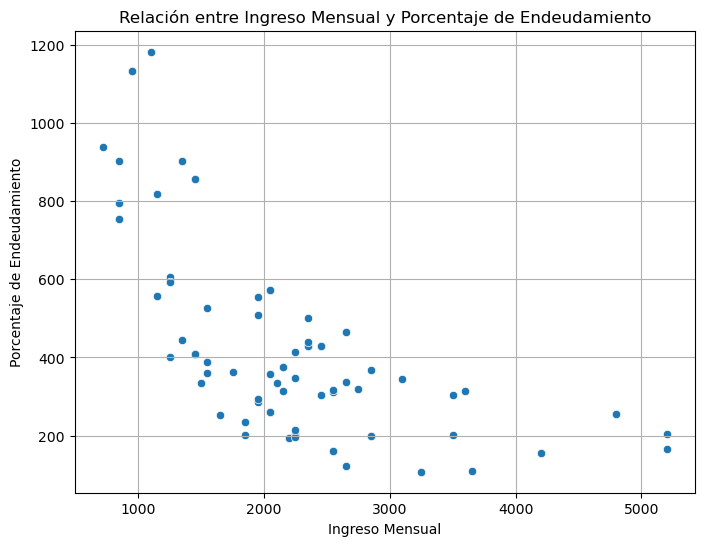

In [129]:
# Graficación (Dispersión)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='IngresoMensual', y='PorcentajeEndeudamiento', data=df_endeudamiento)
plt.title('Relación entre Ingreso Mensual y Porcentaje de Endeudamiento')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Porcentaje de Endeudamiento')
plt.grid(True)
plt.show()

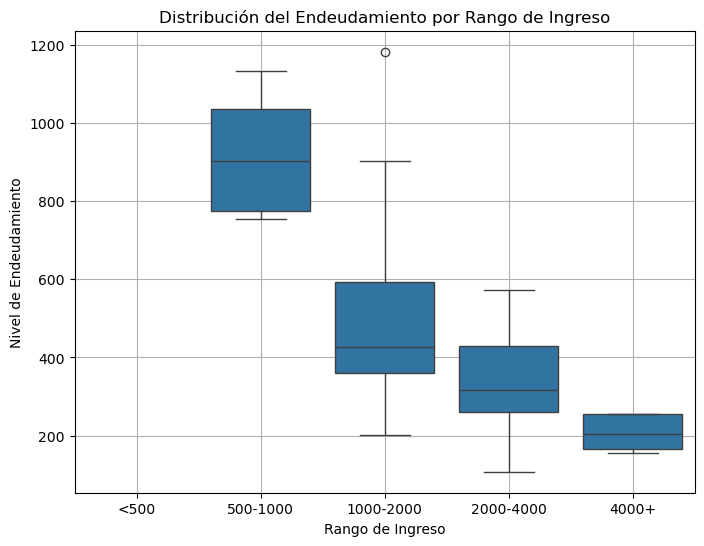

In [130]:
df_endeudamiento['RangoIngreso'] = pd.cut(df_endeudamiento['IngresoMensual'], bins=[0, 500, 1000, 2000, 4000, 10000], labels=['<500', '500-1000', '1000-2000', '2000-4000', '4000+'])

plt.figure(figsize=(8,6))
sns.boxplot(x='RangoIngreso', y='PorcentajeEndeudamiento', data=df_endeudamiento)
plt.title('Distribución del Endeudamiento por Rango de Ingreso')
plt.xlabel('Rango de Ingreso')
plt.ylabel('Nivel de Endeudamiento')
plt.grid(True)
plt.show()

# C.¿Qué se puede inferir a partir de las visualizaciones?.
## Las visualizaciones muestran que:
- La mayoría de los clientes se concentran en la zona inferior izquierda del gráfico de dispersión, lo que indica bajo ingreso mensual y bajo nivel de endeudamiento.
- Sin embargo, el porcentaje de endeudamiento tiende a disminuir a medida que aumenta el ingreso mensual.
## El diagrama de caja indica que:
- Clientes con ingresos entre 500 y 1000 tienen un endeudamiento entre 800% y 1100%, lo cual es alarmante.
- En el rango de ingresos entre 1000 y 2000, el endeudamiento varía entre 200% y 900%.
- Para ingresos entre 2000 y 4000, el endeudamiento baja a 100% - 600%.
- Clientes que ganan más de 4000 presentan un endeudamiento incluso inferior al 200%.
Esto sugiere que a mayor ingreso, menor proporción de deuda relativa.

# D. ¿Qué implicaciones tiene una concentración alta de clientes con alto endeudamiento y bajos ingresos?
- Indica un alto nivel de riesgo crediticio para el banco.
- Estos clientes podrían enfrentar dificultades para cumplir con nuevas obligaciones financieras.
- Podrían tener una mayor probabilidad de morosidad o impago, lo que impactaría en la cartera del banco.
- También limita la posibilidad de ofrecer productos adicionales a estos clientes.

# E. ¿Qué decisiones podría tomar el banco al identificar estos patrones?
1. Endurecer criterios de evaluación crediticia para clientes con ingresos bajos y endeudamiento elevado.
2. Diseñar productos financieros específicos para este segmento, como:
    - Microcréditos con educación financiera
    - Planes de consolidación de deuda
3. Monitoreo más frecuente de estos clientes en cartera.
4. Incluir variables de riesgo adicionales al score crediticio, como el porcentaje de endeudamiento mensual.

# F. ¿Qué ventajas tiene usar un gráfico de dispersión en lugar de un gráfico de barras en este análisis?
- El gráfico de dispersión permite visualizar directamente cómo se comporta la relación entre el ingreso mensual y el nivel de endeudamiento de cada cliente, lo que es crucial para un análisis financiero.
- Este tipo de gráfico facilita identificar concentraciones de clientes (clusters), así como valores atípicos (outliers) que podrían representar riesgos o casos especiales.
- A diferencia de un gráfico de barras, que agrupa datos en categorías fijas, el gráfico de dispersión representa cada cliente como un punto único, lo que da una visión más detallada y precisa.
- Es más fácil observar tendencias como "a mayor ingreso, menor porcentaje de endeudamiento" o identificar zonas de riesgo, como clientes con bajos ingresos y altos niveles de deuda.
- Ayuda a segmentar visualmente a los clientes por su comportamiento financiero, lo cual es útil para decisiones de riesgo crediticio, definición de productos o estrategias de cobranza.

# G. ¿Cómo comunicar estos hallazgos a un equipo no técnico?
El análisis muestra que muchos clientes que ganan poco también deben mucho en proporción a sus ingresos. Esto significa que, aunque sus deudas no sean tan grandes en dinero, para ellos representan una carga muy pesada. En cambio, quienes ganan más, suelen tener sus deudas mejor controladas. Esto es clave para saber a quién sí y a quién no ofrecer más créditos, y qué tipo de productos pueden ayudarles.